# Employee Exit Survey Analysis

In this project, we will be taking a look at exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute. While the data we'll be working with is slightly modified to better accomodate this project, you can find the the original TAFE survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) survey here.

We have one main goal for this project. We would like to find the answer to these questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
* Did more employees in the DETE survey or in the TAFE survey end employment because they were dissatisfied in some way? 

## Data Overview
We'll begin by importing some of the libraries we'll be using in this project, as well as taking a quick look at the data we'll be working with. This will give us an idea of how we'll want to proceed.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv(r"C:/Users/Green Miracle/csv files/dete_survey.csv")
tafe_survey = pd.read_csv(r"C:/Users/Green Miracle/csv files/tafe_survey.csv")

Now that we have our data, let's first take a look at the DETE survey data. We'll print the first few rows and get a summary of the data.

In [2]:
# We'll chain the `isnull()` and `sum()` methods to get an overview of the
# number of missing values in each column
print(dete_survey.isnull().sum())
dete_survey.head()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Definitions for some of the more useful columns in the DETE survey data are as follows:
* `ID` : An id used to identify the participant of the survey
* `SeparationType` : The reason why the person's employment ended
* `Cease Date` : The year or month the person's employment ended
* `DETE Start Date` : The year the person began employment with the DETE

There are lots of columns that are not useful to our main goal of this project, and will be candidates for removal. I also notice that there appears to be columns that contain the value `'Not Stated'`, but would be better represented as `NaN`.

Next, we'll take a look at our TAFE survey data using the same methods.

In [3]:
print(tafe_survey.isnull().sum())
tafe_survey.head()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Definitions for some of the more useful columns in the TAFE survey data are as follows:
* `Record ID` : An id used to identify the participant of the survey
* `Reason for ceasing employment` : The reason why the person's employment ended
* `LengthofServiceOverall...` : The length of the person's employment in years

The TAFE survey data also contains lots of columns that are not useful to our analysis, which can be removed. Both of our dataframes also contain columns that mean the same thing, but are labeled differently. We'll need to make these columns uniform so that we'll be able to merge our data without creating more missing values.

In our quick overview, we have made the following observations:
* Both dataframes contain columns not useful to our end goal
* The dete survey data represents some missing values as `'Not Stated'`
* Both dataframes contain some the same columns, but labeled with different names

## Data Cleaning: Missing Values and Useless Columns

We'll begin by changing the `'Not Stated'` values to `NaN` values in the dete_survey dataframe. This will help us better identify and transform missing values.

In [4]:
# We can easily transform any missing values that aren't represented as `NaN`
# by reading our csv file back in and using the `na_values` parameter
dete_survey = pd.read_csv(r"C:/Users/Green Miracle/csv files/dete_survey.csv", na_values='Not Stated')

dete_survey['DETE Start Date'].head()

0    1984.0
1       NaN
2    2011.0
3    2005.0
4    1970.0
Name: DETE Start Date, dtype: float64

We can see that the `'DETE Start Date'` column, where we first noticed the misrepresented missing values, has now been changed to `NaN`. 

Next, let's drop some of those useless columns that we don't need for our analysis.

In [5]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.drop(dete_survey_updated.columns[30:35], axis=1, inplace=True)

dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [6]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Now we have to dataframes with only the most practical information for our anaylsis. This will save us the trouble of cleaning and dealing with columns we won't even be using.

## Data Cleaning: Column Names

Next, we'll work on standardizing our column names. We'll want to make each column easily callable, uniform, and simple. We'll also want to be sure that any columns that are the same in each dataframe have the same name, so that we'll be able to merge our data later on.

In [7]:
# We'll make all the columns lowercase and replace spaces with an underscore to make everything uniform
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.lower()
                               .str.strip()
                               .str.replace(' ', '_')
                              )

dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age'],
      dtype='object')

In [8]:
# We'll repeat the process on the tafe survey data, but add a regex to remove any special characters
tafe_survey_updated.columns = (tafe_survey_updated.columns
                               .str.lower()
                               .str.replace(r'[.()?/]?( -)?', '')
                               .str.strip()
                               .str.replace(' ', '_')
                              )
# We'll make a dictionary for all the renaming we want to do
tafe_rename = {'record_id':'id', 'cessation_year':'cease_date', 'reason_for_ceasing_employment':'separationtype'
              ,'gender_what_is_your_gender':'gender', 'currentage_current_age':'age'
              ,'employment_type_employment_type':'employment_status', 'classification_classification':'position'
              ,'lengthofserviceoverall_overall_length_of_service_at_institute_in_years':'institute_service'
              ,'lengthofservicecurrent_length_of_service_at_current_workplace_in_years':'role_service'
              }
# And then pass the dictionary as an argument to the rename method
tafe_survey_updated.rename(tafe_rename, axis=1, inplace=True)

tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_public_sector',
       'contributing_factors_career_move_private_sector',
       'contributing_factors_career_move_self-employment',
       'contributing_factors_ill_health',
       'contributing_factors_maternityfamily',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Now the columns in both of our dataframes are using the same format, and any similar columns have been renamed to match each other. This will make working with the dataframes much easier, and will prevent us from creating more missing data when we merge the dataframes.

## Data Cleaning: Useless Rows

Our dataframes contain many rows that aren't useful to our analysis. Due to our analysis goal, we are only interested in resignations. Let's take a look at some of the seperation reasons in both our dataframes, and decide what ones to keep and to remove.

In [9]:
print(f'Dete Survey Seperation Reasons :', dete_survey_updated['separationtype'].value_counts(), sep='\n', end='\n\n')

print(f'Tafe Survey Seperation Reasons :', tafe_survey_updated['separationtype'].value_counts(), sep='\n')

Dete Survey Seperation Reasons :
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Tafe Survey Seperation Reasons :
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


We can see that our dete dataframe contains more than one unique value for resignation. We'll index our specificed rows and assign them new objects. We'll want to be sure to avoid using chained indexing when altering our data, or we'll run into a `SettingWithCopyWarning` warning. We can do this by creating a copy of our indexed dataframes using `.copy()`.

In [10]:
# Since our dete dataframe contains multiple "Resignation" seperation types, we'll use the .str.contains method,
# which will allow us use a regex for simplicity
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(r'^Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,False,Female,36-40
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,False,False,False,False,False,Female,41-45
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,False,Female,31-35
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,False,False,False,False,False,Female,46-50
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,True,True,False,False,False,False,False,False,Male,31-35


Looks like all our indexed dataframes were successfully copied. We will continue to work with these new dataframes.

## Data Cleaning: Date Inconsistencies

It's possible that our data may contain errors, and it's our job to be on the lookout for these errors to the best of our abilities. Since the dates are a big part of our end goal, we should verify that there are no inconsistencies. We'll be on the lookout for any rows that have an unrealistically high or low value.

In [11]:
# Let's first take a quick look at the range of dates in `cease_date`
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

Looks like for the most part, the `cease_date` column contains a range from 2010 - 2014, with one row in 2006. There are also a handful of values that not only show the year of cessation, but the month as well. Since the majority of our data only contain the year, as well as the tafe dataframe only providing the year, we'll remove the month.

In [12]:
# We can use the .str.extract() and pass a regex to return the year for each row
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})').astype(float)

We'll create a quick boxplot for the `dete_start_date` column. This will allow us to quickly spot any extreme values.

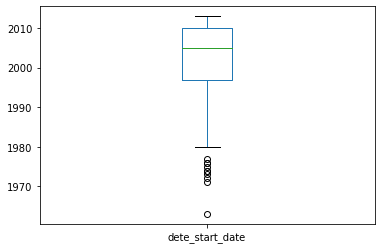

In [13]:
dete_resignations.boxplot('dete_start_date', grid=False)

It appears that our dates are all within a realistic range. 

Now let's take a quick look at our tafe survey data. Since this dataframe doesn't have a start date, we'll only need to take a quick look at the `cease_date` column.

In [14]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

There appears to be no issues with the dates in any of our columns. Now that we've confirmed this, we can continue working with these columns.

Since one of our questions pertains to how long each employee worked before resigning, we need a column that contains this information. While the tafe dataframe already has this information in the `institute_service` column, the dete dataset does not have a similar column. Thankfully, it does have the `dete_start_date` column, which we can use to find this information ourselves.

In [15]:
# We'll subtract the `cease_date` column by the `dete_start_date` column and return it to a new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,Female,36-40,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,False,False,False,False,Female,41-45,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,Female,31-35,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,False,False,False,False,Female,46-50,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,True,False,False,False,False,False,False,Male,31-35,3.0


Now we have a similar column for both dataframes that displays how long each employee worked before resigning.

## Data Cleaning: Dissatisfaction

We now need a way to indicate if an employee was dissatisfied before resigning. Thankfully, there are several columns in each dataframe that will help up answer this:
1. Tafe Survey:
 * `contributing_factors_dissatisfaction`
 * `contributing_factors_job_dissatisfaction`
 * `contributing_factors_interpersonal_conflict`

2. Dete Survey:
 * `job_dissatisfaction`
 * `dissatisfaction_with_the_department`
 * `interpersonal_conflicts`
 * `physical_work_environment`
 * `lack_of_recognition`
 * `lack_of_job_security`
 * `work_location`
 * `employment_conditions`
 * `work_life_balance`
 * `workload`
 
We can use all of these factors to create a new column. If any employees have one or more of these as a factor, we'll mark the employee as `dissatisfied`.

In [16]:
# Let's take a look at how the values are displayed in our tafe dataframe
tafe_resignations['contributing_factors_dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors_dissatisfaction, dtype: int64

It appears that each value is marked with a `-` or the previous column name to designate whether the value is `False` or `True`, respectively. We'll need to update the values in these columns to contain only `True`, `False`, or `NaN`.

In [17]:
# We'll first create a function to use with `DataFrame.applymap()`, so that we can easily
# change each value for multiple columns at once
def update_vals(element):
    if element == '-':
        return False
    
    elif pd.isnull(element):
        return np.nan
    
    else:
        return True

# We'll create a list with our long column names for readability
contributing_factors_tafe = (['contributing_factors_dissatisfaction'
                         ,'contributing_factors_job_dissatisfaction'
                         ,'contributing_factors_interpersonal_conflict']
                       )

tafe_resignations[contributing_factors_tafe] = tafe_resignations[contributing_factors_tafe].applymap(update_vals)

# Let's check to see if our results are correct
tafe_resignations['contributing_factors_dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: contributing_factors_dissatisfaction, dtype: int64

Excellent. Now we can create a new `dissatisfied` column in both dataframes, and use the `DataFrame.any()` method to return `True` if any of the factors in a row are `True`, and `False` if not.

In [18]:
# Create and update the new column for `tafe_resignations`
tafe_resignations['dissatisfied'] = tafe_resignations[contributing_factors_tafe].any(axis=1)

# Create a variable with contributing factors for the dete dataframe for readibility
contributing_factors_dete = (['job_dissatisfaction', 'dissatisfaction_with_the_department'
                             ,'interpersonal_conflicts', 'physical_work_environment'
                             ,'lack_of_recognition', 'lack_of_job_security'
                             ,'work_location', 'employment_conditions'
                             ,'work_life_balance', 'workload']
                            )

# And create and update the new column for `dete_resignations`
dete_resignations['dissatisfied'] = dete_resignations[contributing_factors_dete].any(axis=1)

Now that we have cleaned and updated our dataframes with all the required information, we can give the dataframes a new object and prepare to merge them!

In [19]:
tafe_resignations_up = tafe_resignations.copy()

dete_resignations_up = dete_resignations.copy()

## Data Cleaning: Merging

We can now merge our two dataframes into one that we can easily perform our analysis on.

First, we'll need a way to easily distinguish from which survey each row came from. This can be done by creating a new column and assigning each value the survey name.

In [20]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, ignore_index=True)

Now that we have the `dissatisfied` column, there are several columns that we no longer need for our analysis. Let's verify the number of non-null values in each column, as the columns that were unique to one dataframe will have the least values and will be the one's we no longer need..

In [21]:
combined.notnull().sum().sort_values()

business_unit                                        32
classification                                      161
region                                              265
role_start_date                                     271
dete_start_date                                     283
role_service                                        290
none_of_the_above                                   311
workload                                            311
work_life_balance                                   311
traumatic_incident                                  311
study/travel                                        311
relocation                                          311
maternity/family                                    311
employment_conditions                               311
work_location                                       311
lack_of_job_security                                311
ill_health                                          311
physical_work_environment                       

It appears we can easily remove most of the columns we no longer need by dropping those with less than 500 non-null values. Let's do that now.

In [22]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


Now we have a single dataset, with only the most important information to our analysis. We are almost ready to begin our analysis!

## Data Cleaning: Service Length

We'll finally want to create a column that indicates how experienced each employee is. We can do this by aggregating over the `institute_service` column. However, the `institute_service` column contains a couple different formats, which will make aggregation difficult. To solve this, we will convert each value to a single number with a `float` type. Let's first take a look at the values we'll be converting.

In [23]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


Values that are formated as `#1-#2` will be the most difficult, as the employee could have worked for #1 years or #2 years, where each number would be put into a different career stage. We'll base an employees career stage on their length of time at the company. This [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) provides insight into why this is the best choice. We'll slightly modify the definitions to better accomodate our `#1-#2` formats, so that either one we chose would result in the same career stage.

Modified Definitions:
* New: Less than 3 years
* Experienced: 3-6 years
* Established: 7-10 years
* Veteran: 11 or more years

In [24]:
# We'll use a regex with the `Series.str.extract()` method to extract the first occurance of each number
# Then convert it to a float
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'([0-9][0-9]?)').astype('float')

# And we'll confirm it worked as intended
combined_updated['institute_service'].value_counts(dropna=False).sort_index()

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: institute_service, dtype: int64

Now that our `institute_service` column is in a standard format and can easily be aggregated, we'll create a new function to hold the career stage that each employee was at.

In [25]:
# We'll first need a function to return the career stage, depending on the length of service
def career_stage(element):
    if pd.isnull(element):
        return np.nan
    
    elif element < 3:
        return 'new'
    
    elif element < 7:
        return 'experienced'
    
    elif element < 11:
        return 'established'
    
    else:
        return 'veteran'
    
# And we'll apply our function onto the `institute_service` column, and assign the result
# to a new `service_cat` column
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

Finally, we can begin our analysis on our data.

## Analysis: Shortest Working vs Longest Working

Let's begin the analysis on our first question:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

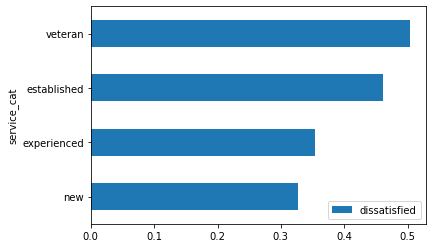

In [50]:
# We'll use `DataFrame.pivot_table()` to find the percent of employee's in each career stage
# that were considered dissatisfied
dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='service_cat').sort_values('dissatisfied')

# Then plot the results
dissatisfied.plot(kind='barh')

From our initial analysis, it appears that employees in later career stages are more likely resign due to some form of dissatisfaction (7+ years). More than 50% of the employees in these stages are resigning from dissatisfaction. However, due to missing values in the `institute_service` and `service_cat` columns, our analysis is not complete. Let's decide how to handle these values.

### Handling Missing Values

In [27]:
# Let's take a look at the age column, as that may be a good alternative to
# specify career stage
combined_updated.pivot_table(values='institute_service', index='age')

,institute_service
age,
20 or younger,1.600000
21 25,1.848485
21-25,2.230769
26 30,2.437500
26-30,4.677419
31 35,2.750000
31-35,5.724138
36 40,4.250000
36-40,6.527778


We can see from these groups of ages, that as age increases, the longer the `institute_service` tends to be. This seems to be a good alternative.

Before we can aggregate on the ages column, we'll need to clean it so that it is in a standard format, similar to how we handled the `institute_service` column earlier.

In [28]:
combined_updated['age'] = combined_updated['age'].astype('str').str.extract(r'([0-9][0-9]?)').astype('float')

combined_updated['age'].value_counts(dropna=False).sort_index()

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
NaN     55
Name: age, dtype: int64

Now, we'll decide how to group each definition by taking a look at a pivot table of our updated column.

In [29]:
combined_updated.pivot_table(values='institute_service', index='age')

combined_updated['service_cat']

0      established
1          veteran
2      experienced
3          veteran
4      experienced
          ...     
646    experienced
647            new
648            NaN
649    experienced
650    experienced
Name: service_cat, Length: 651, dtype: object

With this, we can decide the best career stage for each age range.

They will be defined as:
* New: Ages 25 and under
* Experienced: Ages 26-40
* Established: Ages 41-55
* Veteran: Ages 56 and over

In [30]:
def career_stage_age(element):
    if pd.isnull(element):
        return np.nan
    
    elif element < 26:
        return 'new'
    
    elif element < 41:
        return 'experienced'
    
    elif element < 56:
        return 'established'
    
    else:
        return 'veteran'
    
to_apply = combined_updated['age'].apply(career_stage_age)

combined_updated['service_cat'] = combined_updated['service_cat'].fillna(to_apply)

combined_updated['service_cat'].value_counts(dropna=False)

new            196
experienced    181
veteran        145
established     76
NaN             53
Name: service_cat, dtype: int64

We were able to successfully update around 30+ missing values, which will allow us to get a more accurate analysis on our first question. Now lets decide how to handle the rest of the missing values.

In [31]:
combined_updated[combined_updated['service_cat'].isnull()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
141,4.060000e+02,Resignation-Other reasons,2012.0,Teacher,NaN,NaN,NaN,NaN,True,DETE,NaN
301,8.040000e+02,Resignation-Move overseas/interstate,2013.0,Teacher Aide,Permanent Part-time,NaN,NaN,NaN,False,DETE,NaN
310,8.230000e+02,Resignation-Move overseas/interstate,2013.0,Teacher Aide,NaN,NaN,NaN,NaN,False,DETE,NaN
311,6.341399e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
322,6.341770e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
324,6.341779e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
325,6.341820e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
326,6.341821e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,True,TAFE,NaN
327,6.341831e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
331,6.341934e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,True,TAFE,NaN


There's simply not enough information to make a reasonable estimate for the missing values in the `service_cat` column. Our best course of action is to remove these rows, as they only account for around 8% of our total data and don't contain any useful information for any other of our questions.

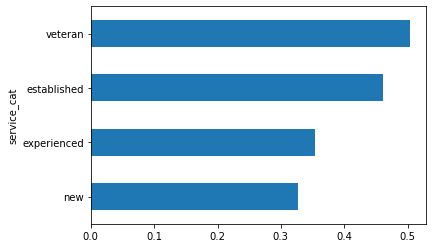

In [46]:
# Remove rows with null values in the `service_cat` column
combined_update_na = combined_updated.dropna(axis=0, subset=['service_cat']).copy()

# Pivot table for all career stages
dissatisfied_stage = combined_update_na.pivot_table(values='dissatisfied', index='service_cat').sort_values('dissatisfied')

# Then plot the results
dissatisfied_stage.plot(kind='barh', legend=False)

It appears that the percent of dissatisfied employees resigning went down slightly in the `established` and `veteran` career stages. However, the data is still mostly the same. 

We can conclude that for our first question, that employees resigning in later career stages are more likely to resign due to some kind of dissatisfaction.

## Anslysis: Younger Employees vs Older Employees

We can now begin to analyse our second question:
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

This question won't be too difficult to answer, as we already cleaned up the majority of missing values. Let's see if there are any missing values in the `age` column.

In [33]:
combined_update_na[combined_update_na['age'].isnull()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
68,215.0,Resignation-Other reasons,2012.0,School Administrative Staff,Permanent Part-time,Female,NaN,13.0,False,DETE,veteran
93,286.0,Resignation-Move overseas/interstate,2012.0,Cleaner,Permanent Full-time,Female,NaN,0.0,False,DETE,new


There are only two missing values. Removing these rows wouldn't have much affect to our data, but we can still make a reasonable estimate to the ages of these rows with the data provided. We will use the `institute_service` column to make an estimate for the ages of these two rows.

In [34]:
combined_update_na.pivot_table(values='institute_service', index='age')

,institute_service
age,
20.0,1.600000
21.0,2.016949
26.0,3.539683
31.0,4.163934
36.0,5.455882
41.0,6.966292
46.0,7.876712
51.0,9.666667
56.0,13.588235


Row index 68 in most likely to be of age 56, while row index 93 is most likely to be age 20. We'll update the values directly, as there are only two.

In [35]:
combined_update_na.loc[68, 'age'] = 56
combined_update_na.loc[93, 'age'] = 20

Now, we can finally answer our question with our cleaned data.

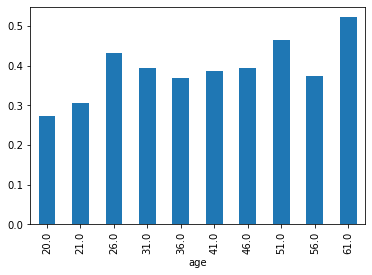

In [36]:
dissatisfied_age = combined_update_na.pivot_table(values='dissatisfied', index='age')

dissatisfied_age.plot(kind='bar', legend=False)

We can see that each age group has a mostly linear relationship with the amount of dissatisfaction. This means, that more older employees tend resign due to dissatisfaction than younger employees, which directly answers our question.

## Analysis: DETE vs TAFE

This brings us to our last question: 
* Did more employees in the DETE survey or in the TAFE survey end employment because they were dissatisfied in some way? 

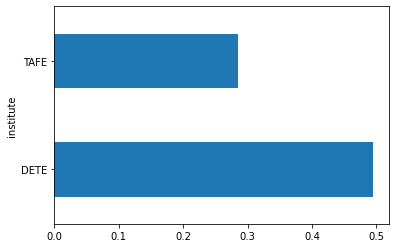

In [41]:
# We'll use the `combined_updated` dataframe where the missing values in `service_cat` still exist
# as those values are not important to this analysis
dissatisfied_institute = combined_updated.pivot_table(values='dissatisfied', index='institute')

dissatisfied_institute.plot(kind='barh', legend=False)

To answer our question, many more employees in the DETE survey resigned due to some kind of dissatisfaction, with close to 50% of all DETE surveyed employees resigning due to dissatisfaction.

## Conclusion

We successfully answered all three of our questions through the cleaning and analysis of our data. 

We found and answered:
* Employees with more career experience tend to resign because of dissatisfaction
* The older an employee is, the more likely they are in a more experienced career stage
* Older employees tend to resign from dissatisfaction more than younger employees
* The DETE survey contained much more employees resigning due to dissatisfaction than the TAFE survey